In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

In [2]:
index = 291951
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
dane_testy = pd.read_csv('https://gist.githubusercontent.com/sikor272/a0ddd825ea715b35518215087090b70a/raw/d0f298961aabf5d6e2635b803b57ef24827d3265/dane_testy.csv', sep=';')

In [4]:
columns = ['Lokalizacja', 'Typ', 'Metoda', 'Liczba_uczniów', 'Płeć', 'Obiad', 'Pre_test']

In [5]:
for i in columns:
  print(i, dane_testy[i].unique())

Lokalizacja ['miejska' 'podmiejska' 'wiejska']
Typ ['niepubliczna' 'publiczna']
Metoda ['standardowa' 'eksperymentalna']
Liczba_uczniów [20 21 18 15 16 19 17 28 27 24 14 22 23 31 25 26 29 30]
Płeć ['dziewczynka' 'chłopiec']
Obiad ['nie kwalifikuje się' 'kwalifikuje się']
Pre_test [62 66 64 61 63 60 67 57 56 58 54 59 65 55 68 73 70 74 76 69 75 78 72 71
 49 53 48 52 50 46 44 51 47 43 37 40 39 41 38 45 36 42 31 35 33 27 30 34
 32 29 28 23 26 77 79 82 80 85 83 84 86 89 93 88 81 87 91 22 25]


In [6]:
print('Szkoła', dane_testy['Szkoła'].unique(), len(dane_testy['Szkoła'].unique()))
print('Klasa', dane_testy['Klasa'].unique(), len(dane_testy['Klasa'].unique()))
print('Uczeń', dane_testy['Uczeń'].unique(), len(dane_testy['Uczeń'].unique()))

Szkoła ['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK'] 23
Klasa ['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH'] 97
Uczeń ['2FHT3' '3JIVH' '3XOWE' ... 'YDR1Z' 'YUEIH' 'ZVCQ8'] 2133


In [7]:
dane_testy['Lokalizacja_Miejska'] = dane_testy['Lokalizacja'].apply(lambda s: 1 if s == 'miejska' else 0)
dane_testy['Lokalizacja_Podmiejska'] = dane_testy['Lokalizacja'].apply(lambda s: 1 if s == 'podmiejska' else 0)
dane_testy['Lokalizacja_Wiejska'] = dane_testy['Lokalizacja'].apply(lambda s: 1 if s == 'wiejska' else 0)
dane_testy['Typ'] = dane_testy['Typ'].apply(lambda s: 1 if s == 'publiczna' else 0)
dane_testy['Metoda'] = dane_testy['Metoda'].apply(lambda s: 1 if s == 'standardowa' else 0)
dane_testy['Płeć'] = dane_testy['Płeć'].apply(lambda s: 1 if s == 'chłopiec' else 0)
dane_testy['Obiad'] = dane_testy['Obiad'].apply(lambda s: 1 if s == 'kwalifikuje się' else 0)

In [8]:
columns = ['Lokalizacja_Miejska', 'Lokalizacja_Podmiejska', 'Lokalizacja_Wiejska', 'Typ', 'Metoda', 'Liczba_uczniów', 'Płeć', 'Obiad', 'Pre_test']

**Macierz korelacji**

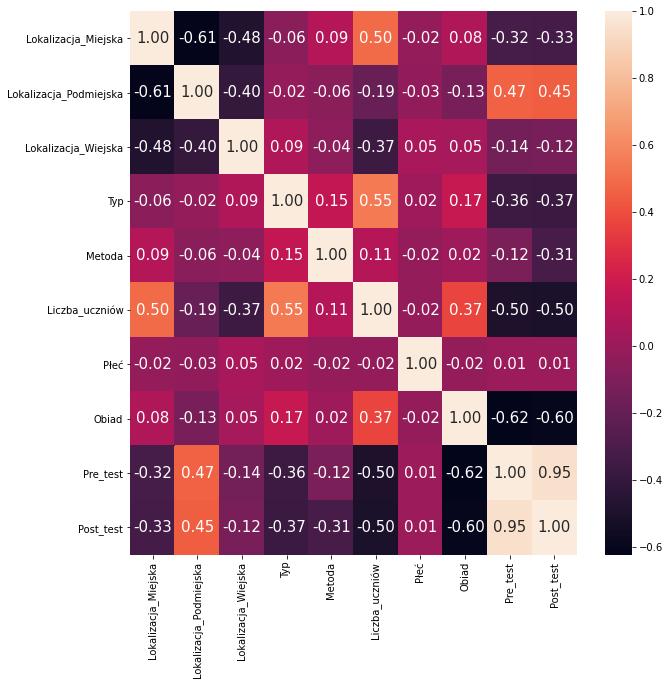

In [9]:
sns.heatmap(dane_testy[columns + ['Post_test']].corr(), annot=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=columns + ['Post_test'], xticklabels=columns + ['Post_test'])
plt.show()

**Macierz wykresów rozrzutów**

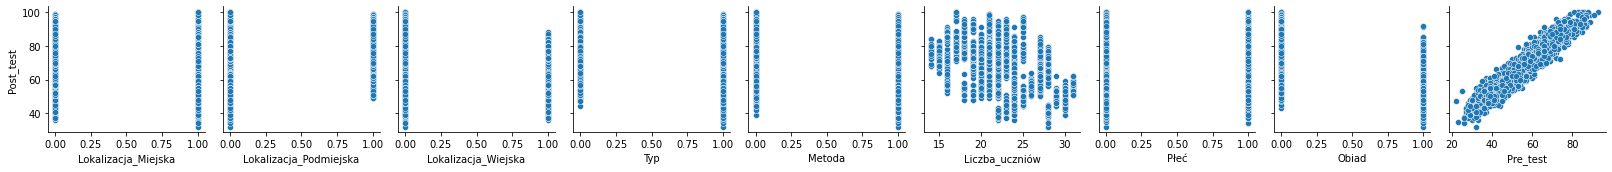

In [10]:
sns.pairplot(dane_testy, x_vars=columns, y_vars=["Post_test"], diag_kind = None)
plt.tight_layout()
plt.show()

**Podział danych**

In [11]:
columns_after = ['Metoda', 'Pre_test']

In [22]:
x_train_all, x_test_all , y_train_all, y_test_all = model_selection.train_test_split(dane_testy[columns], dane_testy['Post_test'], train_size=0.7, random_state=index)

x_train, x_test , y_train, y_test = model_selection.train_test_split(dane_testy[columns_after], dane_testy['Post_test'], train_size=0.7, random_state=index)
y_train = np.array(y_train).reshape((-1, 1))
y_test = np.array(y_test).reshape((-1, 1))

In [13]:
print(dane_testy.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2133, 14)
(1493, 2)
(1493, 1)
(640, 2)
(640, 1)


**Sieć neuronowa**


In [14]:
scaler_x = MinMaxScaler()
scaler_x.fit(x_train)
x_train_norm = scaler_x.transform(x_train)
x_test_norm = scaler_x.transform(x_test)

scaler_y = MinMaxScaler()
scaler_y.fit(y_train)
y_train_norm = scaler_y.transform(y_train)
y_test_norm = scaler_y.transform(y_test)

In [15]:
siec_neur = MLPRegressor(hidden_layer_sizes=(10,), activation='tanh',solver='lbfgs', alpha=0.0001, max_iter = 10000, random_state=index)
_ = siec_neur.fit(x_train_norm, y_train_norm.ravel())

In [16]:
siec_neur.coefs_

[array([[ 0.06380371,  0.41659863, -0.11286716,  0.07109007, -0.41751684,
         -0.1776192 ,  0.39736241,  0.02499084, -0.5331109 , -0.42777226],
        [ 0.07890211, -0.23239273, -0.28319172,  0.70782057, -0.47081026,
          0.19953891, -0.49459045, -0.29377109, -0.64742896,  0.58176771]]),
 array([[-0.4821745 ],
        [-0.64034548],
        [-0.46619104],
        [ 0.24676655],
        [-0.33518398],
        [-0.35515879],
        [-0.38801778],
        [-0.26555957],
        [-0.45759646],
        [ 0.43865542]])]

In [17]:
y_predict_train = siec_neur.predict(x_train_norm)
y_predict_train = y_predict_train.reshape((-1, 1))
y_predict_train_denorm = scaler_y.inverse_transform(y_predict_train)

y_predict_test = siec_neur.predict(x_test_norm)
y_predict_test = y_predict_test.reshape((-1, 1))
y_predict_test_denorm = scaler_y.inverse_transform(y_predict_test)

In [18]:
print('MSE dla uczacej ', mean_squared_error(y_train, y_predict_train_denorm))
print('MAE dla uczacej  ', mean_absolute_error(y_train, y_predict_train_denorm))
print('RMSE dla uczacej ', np.sqrt(mean_squared_error(y_train, y_predict_train_denorm)))
print('')
print('MSE dla testowej', mean_squared_error(y_test, y_predict_test_denorm))
print('MAE dla testowej ', mean_absolute_error(y_test, y_predict_test_denorm))
print('RMSE dla testowej', np.sqrt(mean_squared_error(y_test, y_predict_test_denorm)))

MSE dla uczacej  10.43688987233718
MAE dla uczacej   2.598524673078002
RMSE dla uczacej  3.230617568257992

MSE dla testowej 10.980476439657515
MAE dla testowej  2.614234546839702
RMSE dla testowej 3.3136801957427204


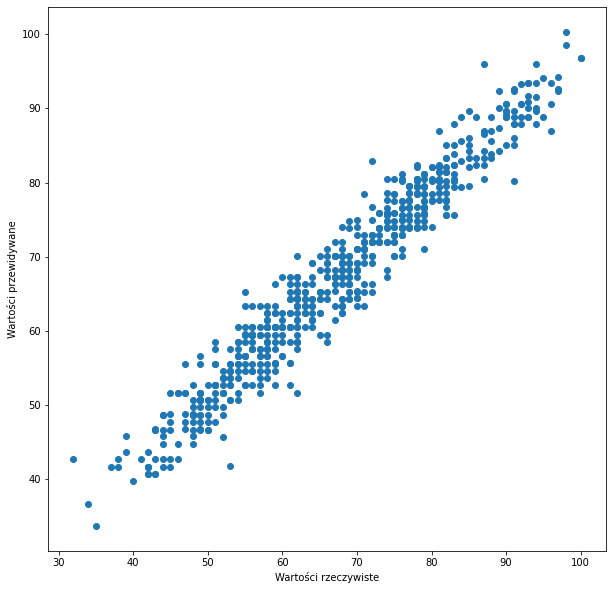

In [19]:
plt.scatter(x=y_test, y=y_predict_test_denorm)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.show()

**Drzewo CART** wszystkie predyktory

In [20]:
drzewo = DecisionTreeRegressor(criterion="mse", max_depth=5, min_samples_split=10, min_samples_leaf=40, random_state=index)
_ = drzewo.fit(x_train_all, y_train_all)

In [24]:
for i, j in zip(columns, drzewo.feature_importances_):
  print(i, ' ważność:', j)

Lokalizacja_Miejska  ważność: 0.03013734285083393
Lokalizacja_Podmiejska  ważność: 0.9698626571491661


**Drzewo CART**

In [23]:
drzewo = DecisionTreeRegressor(criterion="mse", max_depth=5, min_samples_split=10, min_samples_leaf=40, random_state=index)
_ = drzewo.fit(x_train, y_train)

In [25]:
for i, j in zip(columns_after, drzewo.feature_importances_):
  print(i, ' ważność:', j)

Metoda  ważność: 0.03013734285083393
Pre_test  ważność: 0.9698626571491661


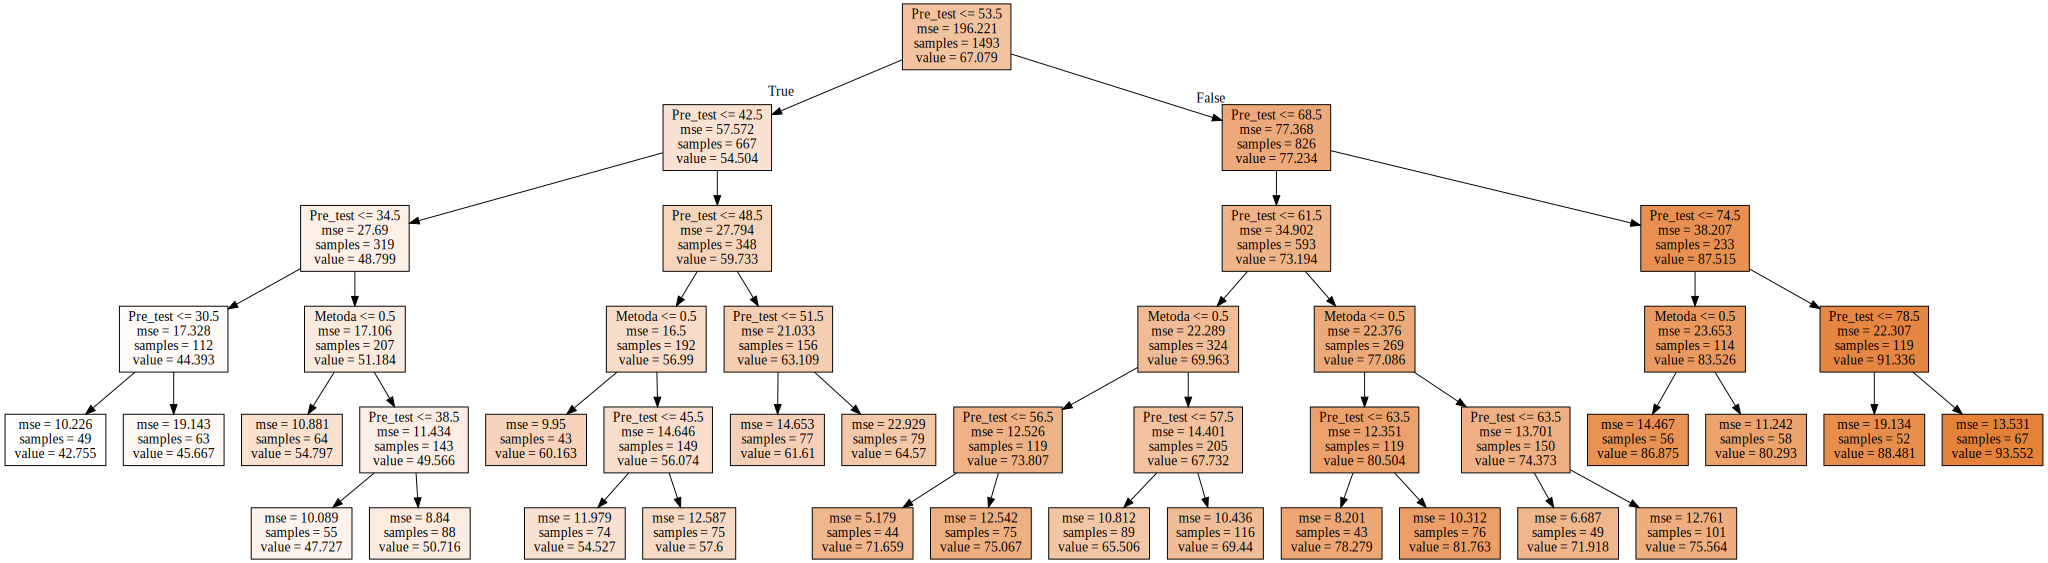

In [26]:
graphviz.Source(export_graphviz(drzewo, filled=True, feature_names=columns_after))

In [27]:
y_predict_train_cart = drzewo.predict(x_train)
y_predict_test_cart = drzewo.predict(x_test)

In [28]:
print('MSE dla uczacej ', mean_squared_error(y_train, y_predict_train_cart))
print('MAE dla uczacej  ', mean_absolute_error(y_train, y_predict_train_cart))
print('RMSE dla uczacej ', np.sqrt(mean_squared_error(y_train, y_predict_train_cart)))
print('')
print('MSE dla testowej', mean_squared_error(y_test, y_predict_test_cart))
print('MAE dla testowej ', mean_absolute_error(y_test, y_predict_test_cart))
print('RMSE dla testowej', np.sqrt(mean_squared_error(y_test, y_predict_test_cart)))

MSE dla uczacej  12.31893753879136
MAE dla uczacej   2.82227067078129
RMSE dla uczacej  3.509834403328932

MSE dla testowej 14.710357083383645
MAE dla testowej  3.0421587078605383
RMSE dla testowej 3.835408333330839


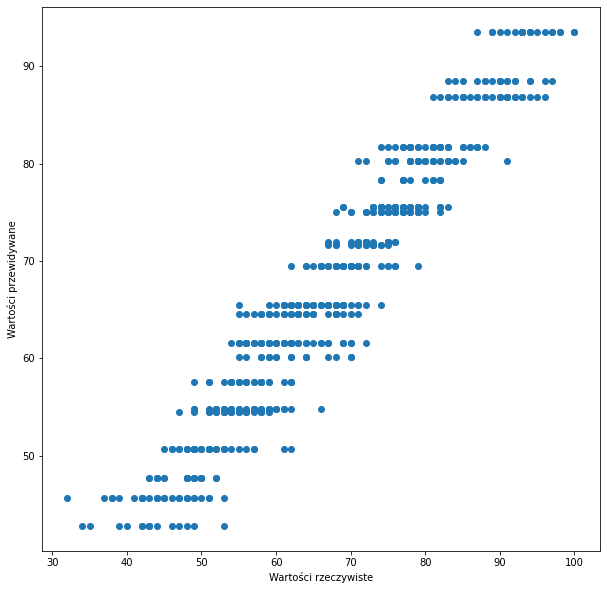

In [29]:
plt.scatter(x=y_test, y=y_predict_test_cart)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.show()